In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [3]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [4]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)
total_batch = int(mnist.train.num_examples/batch_size)

cost_agg = []
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        cost_agg.append(c)
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("epoch {}, cost={:.9f}".format(epoch, c))

print("Optimization Finished!")

epoch 0 , cost=0.203642353
epoch 1 , cost=0.166029006
epoch 2 , cost=0.151016638
epoch 3 , cost=0.136534557
epoch 4 , cost=0.132183850
epoch 5 , cost=0.121135771
epoch 6 , cost=0.117956989
epoch 7 , cost=0.113629013
epoch 8 , cost=0.113238141
epoch 9 , cost=0.110964194
epoch 10 , cost=0.108907282
epoch 11 , cost=0.106479272
epoch 12 , cost=0.106927857
epoch 13 , cost=0.103978969
epoch 14 , cost=0.103042021
epoch 15 , cost=0.101943836
epoch 16 , cost=0.099922024
epoch 17 , cost=0.099073283
epoch 18 , cost=0.098296151
epoch 19 , cost=0.098554961
Optimization Finished!


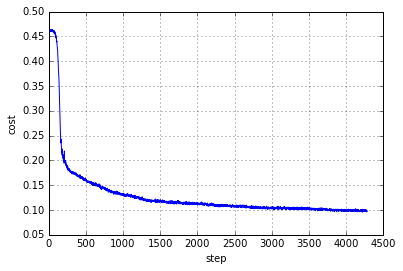

In [6]:
plt.plot(cost_agg)
plt.xlabel('step')
plt.ylabel('cost')
plt.grid()

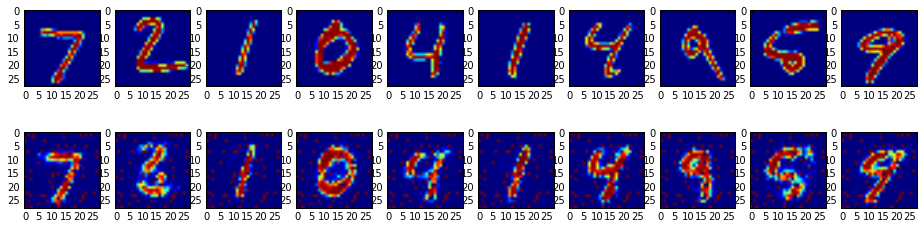

In [8]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(16, 4))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()

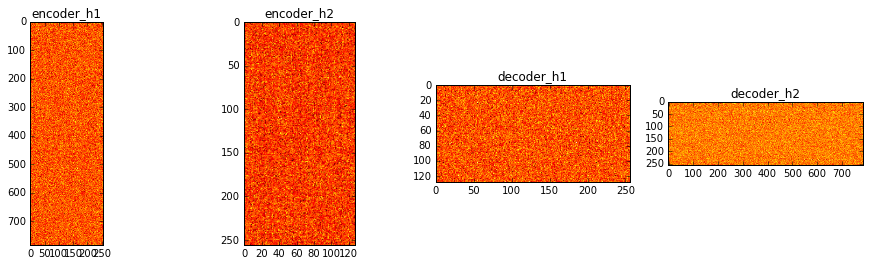

In [10]:
w = sess.run(weights)
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
i = 0
for k, v in w.items():
    ax[i].imshow(np.reshape(v, v.shape), cmap="hot")
    ax[i].set_title(k)
    i += 1

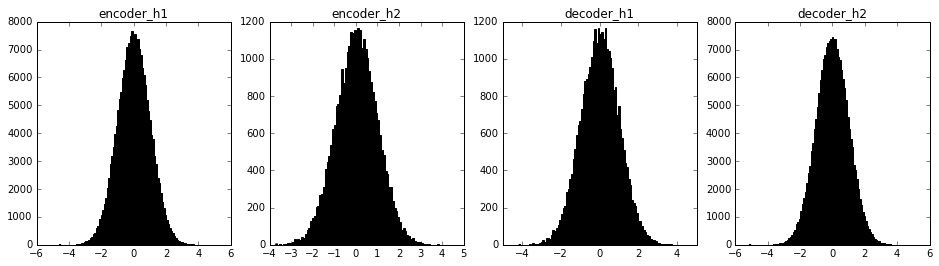

In [11]:
w = sess.run(weights)
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
i = 0
for k, v in w.items():
    ax[i].hist(v.ravel(), bins=100, fc='k', ec='k')
    ax[i].set_title(k)
    i += 1
plt.draw()